In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path_kafka = r"D:\autoencoder\SparseEncoder\save\result\kafka"
file_path_kylin = r"D:\autoencoder\SparseEncoder\save\result\kylin"
file_path_ant = r"D:\autoencoder\SparseEncoder\save\result\ant"
file_path_tomcat = r"D:\autoencoder\SparseEncoder\save\result\tomcat"

In [3]:
import os
import re
import json

In [4]:
filename_kafka = [os.path.join(file_path_kafka,filename) for filename in os.listdir(file_path_kafka)]
filename_kylin = [os.path.join(file_path_kylin,filename) for filename in os.listdir(file_path_kylin)]
filename_ant = [os.path.join(file_path_ant,filename) for filename in os.listdir(file_path_ant)]
filename_tomcat = [os.path.join(file_path_tomcat,filename) for filename in os.listdir(file_path_tomcat)]

In [5]:
result_kafka = np.zeros(36)
pattern = re.compile("[\w\W]:\s*(\d+\.\d+)")
for i,filename in enumerate(filename_kafka):
    with open(filename,'r') as f:
        tmp = f.readlines()
        f_s = float(pattern.findall(tmp[1])[0])
        result_kafka[i] = f_s
        f.close()

In [6]:
result_kylin = np.zeros(36)
pattern = re.compile("[\w\W]:\s*(\d+\.\d+)")
for i,filename in enumerate(filename_kylin):
    with open(filename,'r') as f:
        tmp = f.readlines()
        f_s = float(pattern.findall(tmp[1])[0])
        result_kylin[i] = f_s
        f.close()

In [7]:
result_ant = np.zeros(36)
pattern = re.compile("[\w\W]:\s*(\d+\.\d+)")
for i,filename in enumerate(filename_ant):
    with open(filename,'r') as f:
        tmp = f.readlines()
        f_s = float(pattern.findall(tmp[1])[0])
        result_ant[i] = f_s
        f.close()

In [8]:
result_tomcat = np.zeros(36)
pattern = re.compile("[\w\W]:\s*(\d+\.\d+)")
for i,filename in enumerate(filename_tomcat):
    with open(filename,'r') as f:
        tmp = f.readlines()
        f_s = float(pattern.findall(tmp[1])[0])
        result_tomcat[i] = f_s
        f.close()

In [9]:
result_kafka_ = result_kafka.reshape(4,9)
result_kylin_ = result_kylin.reshape(4,9)
result_ant_ = result_ant.reshape(4,9)
result_tomcat_ = result_tomcat.reshape(4,9)

In [10]:
axis_y = np.linspace(0.2,0.8,4)
axis_y_ = [str(round(y_v,2)) for y_v in axis_y]

In [11]:
axis_x = np.linspace(0.0,2.0,9)
axis_x_ = [str(round(x_v,2)) for x_v in axis_x]

In [12]:
result_all = [result_kafka_,result_kylin_,result_ant_,result_tomcat_]
title_list = ["kafka参数结果分布图","kylin参数结果分布图","ant参数结果分布图","tomcat参数结果分布图"]

In [13]:
from matplotlib import font_manager
from pylab import mpl,text

In [14]:
simsun = font_manager.FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc",size=18)
roman = font_manager.FontProperties(fname=r"C:\Windows\Fonts\times.ttf",size=18)

mpl.rcParams["font.sans-serif"] = ['Simsun']

fontcn = {'family':'SimSun','size':18}
fonten = {'family':'Times New Roman','size':18}

In [15]:
import math
from mpl_toolkits.axes_grid1 import ImageGrid

In [17]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

d:\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


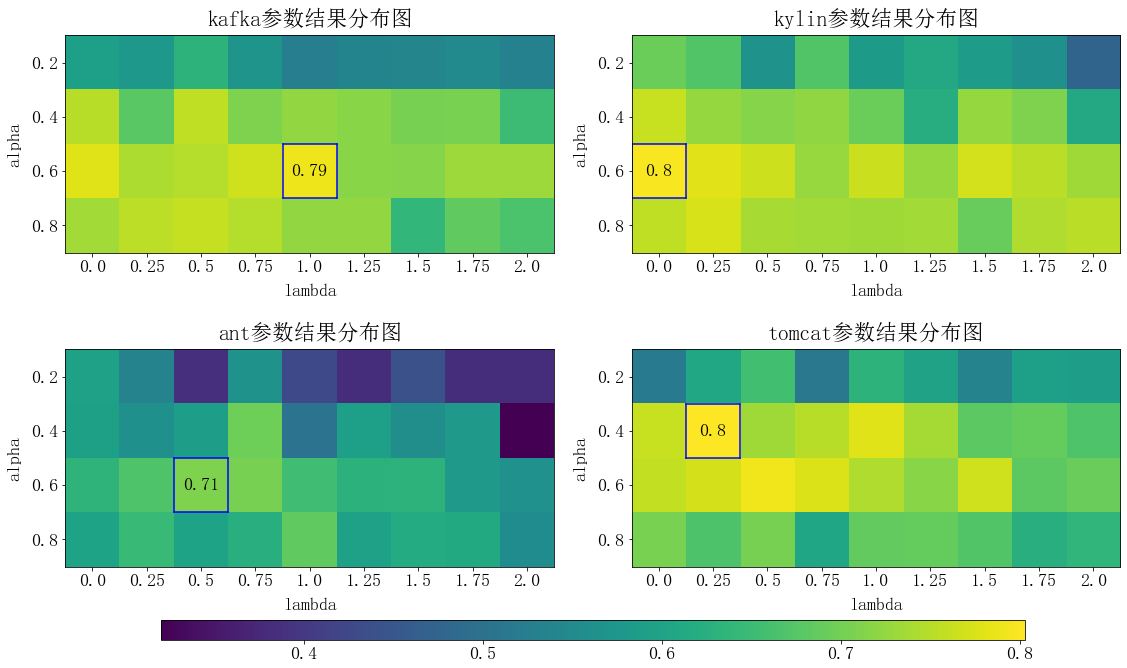

In [20]:
vmin = min(np.min(result_all[0]),np.min(result_all[1]),np.min(result_all[2]),np.min(result_all[3]))
vmax = max(np.max(result_all[0]),np.max(result_all[1]),np.max(result_all[2]),np.max(result_all[3]))

fig = plt.figure(figsize=(16,9))
plt.rcParams["font.size"] = 18
# plt.rcParams["font.weight"] = 'heavy'
axes = []
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    axes.append(ax)
    plt.xticks(np.arange(len(axis_x_)),axis_x_)
    plt.yticks(np.arange(len(axis_y_)),axis_y_)
    plt.xlabel("lambda",labelpad=10)
    plt.ylabel("alpha",labelpad=10)
    plt.title(title_list[i],pad=10)
    im = plt.imshow(result_all[i],vmin=vmin,vmax=vmax)
    row = np.argmax(result_all[i])//9 + 1
    col = np.argmax(result_all[i]) - 9*(row-1)
    plt.text(x=col,y=(row-1),s=round(result_all[i][row-1,col],2), ha="center", va="center")
    plt.plot([col-0.5,col+0.5],[[row-1.5,row-0.5],[row-1.5,row-0.5]],'b')
    plt.plot([[col-0.5,col+0.5],[col-0.5,col+0.5]],[row-1.5,row-0.5],'b')
#     a = ax.pcolormesh(result_all[i], norm=norm)

position=fig.add_axes([0.15, -0.01, 0.75, 0.03])#位置[左,下,右,上]
cb=plt.colorbar(im,ax=axes,cax=position,orientation='horizontal')
plt.subplots_adjust(wspace=(0.3),hspace=(0.15))
plt.tight_layout()
# plt.savefig("./热力图.jpg",dpi=500,bbox_inches="tight")
plt.show()

In [156]:
result_kafka = np.zeros(36)
pattern = re.compile("[\w\W]:\s*(\d+\.\d+)")
for i,filename in enumerate(filename_kafka):
    with open(filename,'r') as f:
        tmp = f.readlines()
        f_s = float(pattern.findall(tmp[0])[0])
        result_kafka[i] = f_s
        f.close()

In [157]:
result_kylin = np.zeros(36)
pattern = re.compile("[\w\W]:\s*(\d+\.\d+)")
for i,filename in enumerate(filename_kylin):
    with open(filename,'r') as f:
        tmp = f.readlines()
        f_s = float(pattern.findall(tmp[0])[0])
        result_kylin[i] = f_s
        f.close()

In [158]:
result_ant = np.zeros(36)
pattern = re.compile("[\w\W]:\s*(\d+\.\d+)")
for i,filename in enumerate(filename_ant):
    with open(filename,'r') as f:
        tmp = f.readlines()
        f_s = float(pattern.findall(tmp[0])[0])
        result_ant[i] = f_s
        f.close()

In [159]:
result_tomcat = np.zeros(36)
pattern = re.compile("[\w\W]:\s*(\d+\.\d+)")
for i,filename in enumerate(filename_tomcat):
    with open(filename,'r') as f:
        tmp = f.readlines()
        f_s = float(pattern.findall(tmp[0])[0])
        result_tomcat[i] = f_s
        f.close()

In [160]:
result_kafka_ = result_kafka.reshape(4,9)
result_kylin_ = result_kylin.reshape(4,9)
result_ant_ = result_ant.reshape(4,9)
result_tomcat_ = result_tomcat.reshape(4,9)

In [161]:
result_all = [result_kafka_,result_kylin_,result_ant_,result_tomcat_]
title_list = ["kafka参数结果分布图","kylin参数结果分布图","ant参数结果分布图","tomcat参数结果分布图"]

d:\python\lib\site-packages\ipykernel_launcher.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


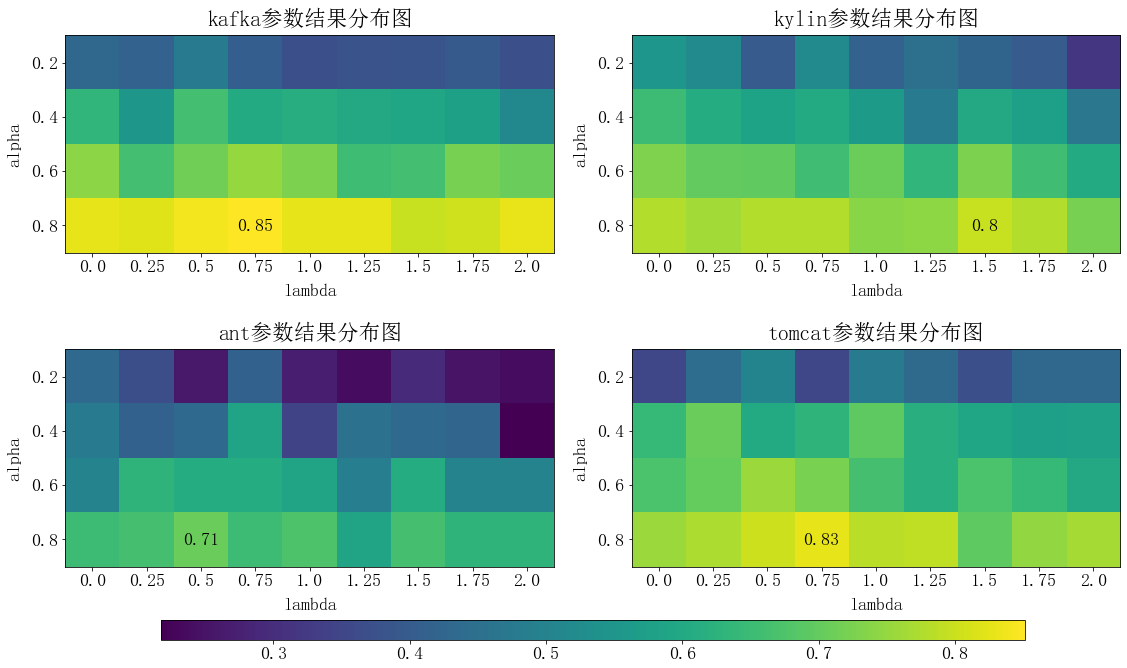

In [162]:
vmin = min(np.min(result_all[0]),np.min(result_all[1]),np.min(result_all[2]),np.min(result_all[3]))
vmax = max(np.max(result_all[0]),np.max(result_all[1]),np.max(result_all[2]),np.max(result_all[3]))

fig = plt.figure(figsize=(16,9))
plt.rcParams["font.size"] = 18
# plt.rcParams["font.weight"] = 'heavy'
# plt.rcParams['font.family'] = ['sans-serif']
# plt.rcParams['font.sans-serif'] = ['SimHei']
axes = []
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    axes.append(ax)
    plt.xticks(np.arange(len(axis_x_)),axis_x_)
    plt.yticks(np.arange(len(axis_y_)),axis_y_)
    plt.xlabel("lambda",labelpad=10)
    plt.ylabel("alpha",labelpad=10)
    im = plt.imshow(result_all[i],vmin=vmin,vmax=vmax)
    row = np.argmax(result_all[i])//9 + 1
    col = np.argmax(result_all[i]) - 9*(row-1)
    plt.text(x=col,y=(row-1),s=round(result_all[i][row-1,col],2), ha="center", va="center")
    plt.title(title_list[i],pad=10)
position=fig.add_axes([0.15, -0.01, 0.75, 0.03])#位置[左,下,右,上]
cb=plt.colorbar(im,ax=axes,cax=position,orientation='horizontal')
# plt.subplots_adjust(wspace=0.2,hspace=-0.3)
plt.tight_layout()
plt.savefig("./热力图_recall.jpg",dpi=500,bbox_inches="tight")
plt.show()

In [282]:
from scipy.stats import chisquare,chi2_contingency
import pymysql
import pandas as pd
import math

In [389]:
connection = pymysql.connect(host='localhost', port=3306, user='root', passwd='123', db='tomcat')

sql = "select * from all_data_retain"

curse = connection.cursor()

row = curse.execute(sql)

result = curse.fetchall()

columns = []
for i in range(len(curse.description)):
    columns.append(curse.description[i][0])

curse.close()
connection.close()

df = pd.DataFrame(data=result, columns=columns)

labels = df.label.values

df.drop(columns=['id', 'label', 'annotators', 'parameter_number', 'parameter', 'methodName', 'className',
                 'filename'], inplace=True)

In [390]:
dic_index = {
    1:1, 2:17, 3:18, 4:19, 5:20, 6:21, 7:22, 8:2, 9:3, 10:4, 11:23, 12:24, 13:25, 14:26, 15:5, 17:6, 18:8, 19:9, 20:10,
    21:11, 22:12, 23:27, 24:13, 25:14, 26:15, 27:16, 28:28, 29:32, 30:34, 31:30, 32:35, 33:36, 34:37, 35:29, 36:31, 37:33, 38:43, 39:42,
    40:41, 41:40, 42:39, 43:38, 44:59, 45:46, 46:52, 47:51, 48:49, 49:50, 50:47, 51:48, 52:54, 53:58, 54:57, 55:56, 56:53, 57:55, 58:45,
    59:44
}

In [391]:
df_test = pd.DataFrame(data=np.zeros(df.shape),columns=None,index=None)

In [392]:
for k,v in dic_index.items():
    df_test.iloc[:,v-1] = df.iloc[:,k-1]

In [393]:
df_test.drop(columns=[58],inplace=True)

In [349]:
from sklearn.feature_selection import mutual_info_classif

In [376]:
mi_kafka = mutual_info_classif(df_test.values,labels)

In [382]:
mi_kylin = mutual_info_classif(df_test.values,labels)

In [394]:
mi_tomcat = mutual_info_classif(df_test.values,labels)

In [388]:
mi_ant = mutual_info_classif(df_test.values,labels)

In [395]:
all_mi = np.vstack([mi_kafka,mi_kylin,mi_ant,mi_tomcat])

In [404]:
x_t_c = ["$x_c^{}{}{}$".format('{',i+1,'}') for i in range(37)]
x_t_p = ["$x_p^{}{}{}$".format('{',i+1,'}') for i in range(6)]
x_t_d = ["$x_d^{}{}{}$".format('{',i+1,'}') for i in range(15)]

In [405]:
x_t = x_t_c+x_t_p+x_t_d

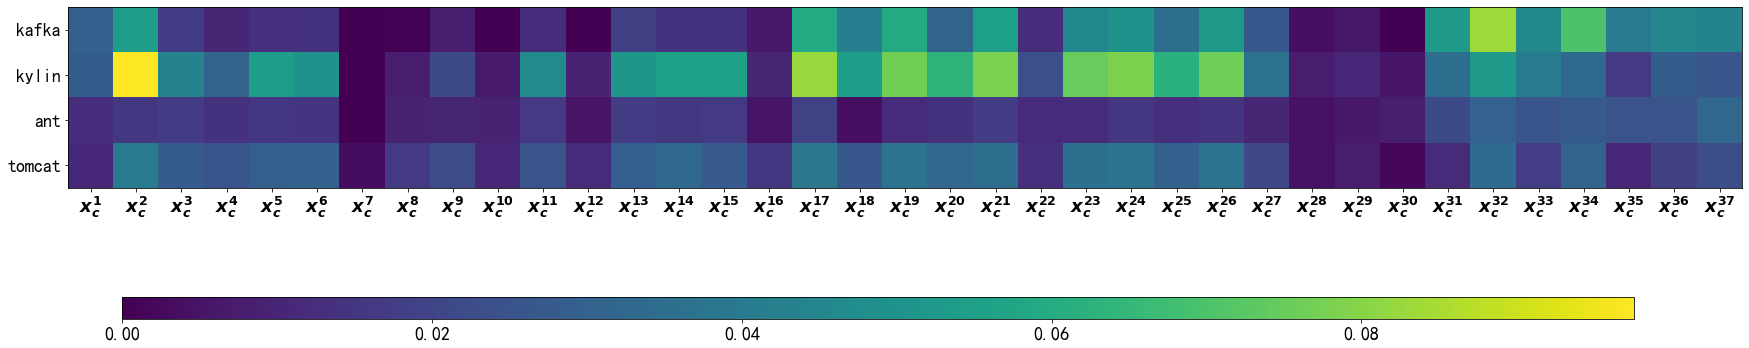

In [448]:
fig = plt.figure(figsize=(30,30))
im = plt.imshow(all_mi[:,:37])
# plt.xlabel()
plt.yticks(np.arange(4),["kafka","kylin","ant","tomcat"])
plt.xticks(np.arange(37),x_t_c)
# plt.colorbar()
position=fig.add_axes([0.15, 0.4, 0.7, 0.01])#位置[左,下,右,上]
cb=plt.colorbar(im,cax=position,orientation='horizontal')
plt.savefig("./相关性_代码.jpg",dpi=500,bbox_inches="tight")
plt.show()

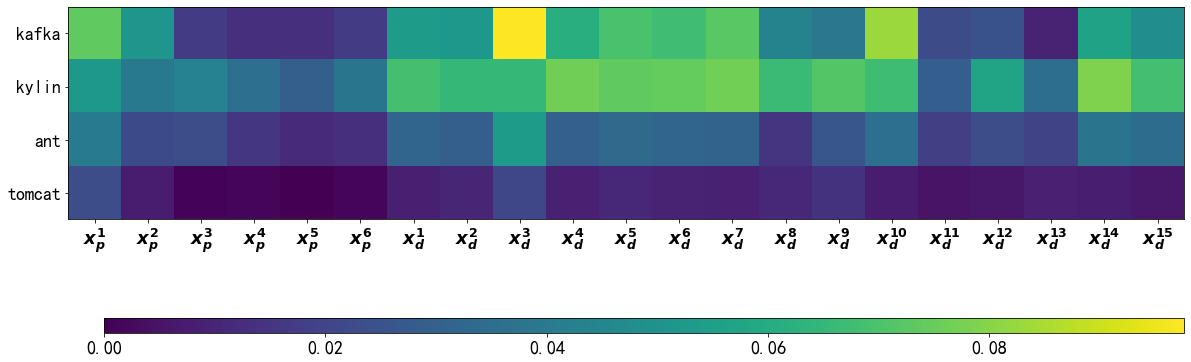

In [449]:
fig = plt.figure(figsize=(20,20))
plt.imshow(all_mi[:,37:])
# plt.xlabel()
plt.yticks(np.arange(4),["kafka","kylin","ant","tomcat"])
plt.xticks(np.arange(21),x_t_p+x_t_d)
# plt.colorbar()
position=fig.add_axes([0.15, 0.35, 0.75, 0.01])#位置[左,下,右,上]
cb=plt.colorbar(im,cax=position,orientation='horizontal')
plt.savefig("./相关性_过程_人.jpg",dpi=500,bbox_inches="tight")
plt.show()

In [4]:
kafka_result_no = [0.8401,0.7607,0.9525,0.0721]
kylin_result_no = [0.8111,0.7698,0.9529,0.024]
ant_result_no = [0.6086,0.7088,0.9459,0.008]
tomcat_reuslt_no = [0.7544,0.7875,0.9667,0.0042]

In [3]:
kafka_result_ = [0.8428,0.7804,0.9568,0.0628]
kylin_result_ = [0.7639,0.7739,0.9457,0.0238]
ant_result_ = [0.6521,0.7185,0.9502,0.0072]
tomcat_result_ = [0.7544,0.7924,0.9652,0.0037]

In [5]:
metric_ = ["recall","f1_score","auc","fpr"]

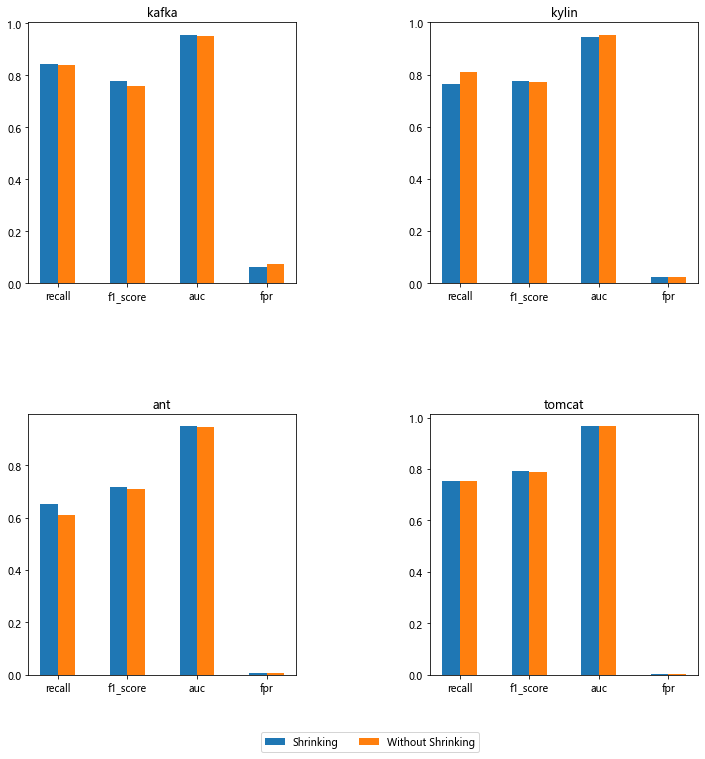

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
x = np.arange(len(metric_)) # x轴刻度标签位置
width = 0.25 # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.bar(x - width/2, kafka_result_, width, label='Shrinking')
plt.bar(x + width/2, kafka_result_no, width, label='Without Shrinking')
# plt.ylabel('')
plt.xticks(x, labels=metric_)
plt.title('kafka')
# plt.legend()
plt.subplot(2,2,2)
plt.bar(x - width/2, kylin_result_, width, label='Shrinking')
plt.bar(x + width/2, kylin_result_no, width, label='Without Shrinking')
plt.xticks(x, labels=metric_)
# plt.legend()
plt.title("kylin")
plt.subplot(2,2,3)
plt.bar(x - width/2, ant_result_, width, label='Shrinking')
plt.bar(x + width/2, ant_result_no, width, label='Without Shrinking')
plt.xticks(x, labels=metric_)
# plt.legend()
plt.title("ant")
plt.subplot(2,2,4)
plt.bar(x - width/2, tomcat_result_, width, label='Shrinking')
plt.bar(x + width/2, tomcat_reuslt_no, width, label='Without Shrinking')
plt.xticks(x, labels=metric_)
plt.legend(ncol=2,bbox_to_anchor=(0.2,-0.2))
plt.title("tomcat")
plt.subplots_adjust(wspace=(0.5),hspace=(0.5))
plt.savefig("./问题4对比.jpg",dpi=500,bbox_inches="tight")
plt.show()